<a href="https://colab.research.google.com/github/QuantumQist/Cybenko_Theorem_Visualizaton_YT/blob/main/Uniwersalne_twierdzenie_o_przybli%C5%BCeniach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementacja sieci opisanej w publikacji
* Cybenko, George. "Approximation by superpositions of a sigmoidal function." Mathematics of control, signals and systems 2, no. 4 (1989): 303-314.

In [1]:
import torch
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2]:
class Network(torch.nn.Module):
    def __init__(self, hidden_units: int):
        super().__init__()
        self.hidden_units = hidden_units # Number of neurons in the hidden layer

        self.network = torch.nn.Sequential(
            torch.nn.Linear(1, self.hidden_units),
            torch.nn.Sigmoid(),
            torch.nn.Linear(self.hidden_units, 1, bias = False))

        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        self.loss = torch.nn.MSELoss()

    def train(self, f, x_min, x_max, n=100, epochs=100):
        """
        Train the network to approximate the function f(x).

        Parameters:
            f (callable): The function to approximate. Assumed to be implemented in numpy.
            x_min (float): The minimum value of x.
            x_max (float): The maximum value of x.
            n (int, optional): The number of points to sample between x_min and x_max.
            epochs (int, optional): The number of epochs to train for.
        """
        # Create data to train on
        x = np.linspace(x_min, x_max, n)
        y = torch.tensor([f(xi) for xi in x], dtype=torch.float32)
        x = torch.tensor(x, dtype=torch.float32)
        x = x.reshape(-1, 1)
        y = y.reshape(-1, 1)

        # Set up a list to store the loss
        loss_list = []

        # Train the network
        for epoch in tqdm(range(epochs)):
            # Zero the gradients
            self.optimizer.zero_grad()
            # Forward pass
            output = self.forward(x)
            # Calculate the loss
            loss = self.loss(output, y)
            loss_list.append(loss.item())
            # Backward pass
            loss.backward()
            # Update the weights
            self.optimizer.step()

        return loss_list

    def forward(self, x):
        return self.network(x)

**Funkcja do wyuczenia**

In [3]:
x_min, x_max = -5, 5

def f(x):
    return ((x-3)**2 * (x+3)**2 + 10*x) / 100

# def f(x):
#     return np.sin(x)

**Wykres**

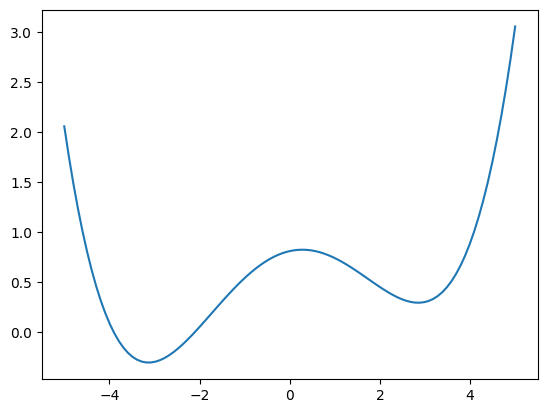

In [4]:
x_s = np.linspace(x_min, x_max, 100)
y_s = [f(xi) for xi in x_s]

plt.plot(x_s, y_s)
plt.show()

**Postawienie i trenowanie sieci**

  0%|          | 0/30000 [00:00<?, ?it/s]

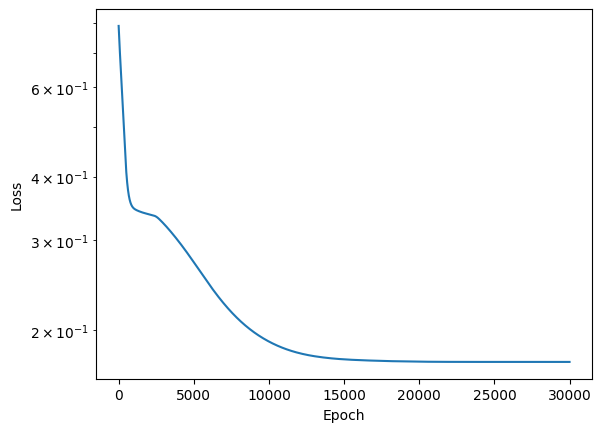

  0%|          | 0/30000 [00:00<?, ?it/s]

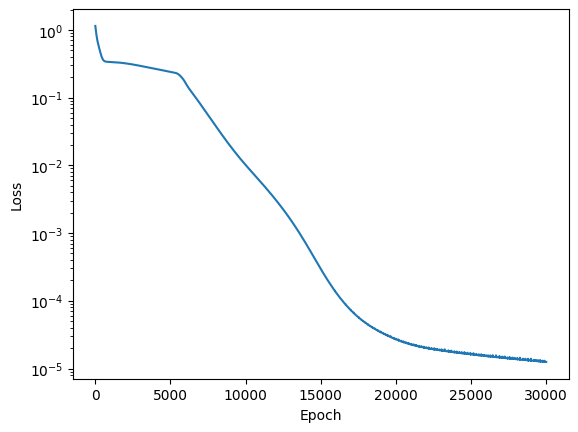

In [5]:
HIDDEN_UNITS = 6

model_2 = Network(2)
model_6 = Network(HIDDEN_UNITS)
loss_list = model_2.train(f, x_min, x_max, epochs=30000)

plt.plot(range(1, len(loss_list) + 1),loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.show()

loss_list = model_6.train(f, x_min, x_max, epochs=30000)

plt.plot(range(1, len(loss_list) + 1),loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.show()

**Sprawdzenie sieci**

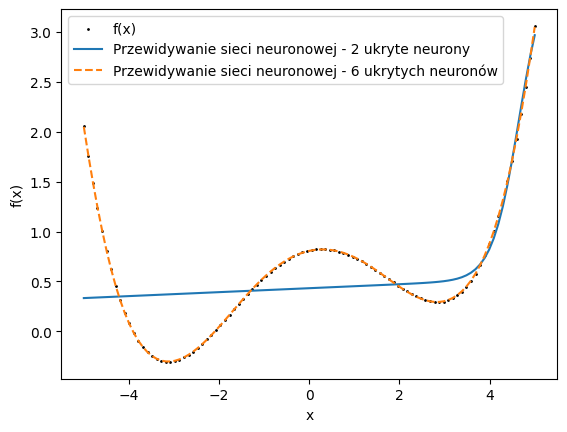

In [7]:
# Ground truth
x_s = np.linspace(x_min, x_max, 100)
y_s = [f(xi) for xi in x_s]

# Prediction
x_tensor = torch.tensor(x_s, dtype=torch.float32).reshape(-1, 1)
with torch.inference_mode():
    y_pred_2 = model_2.forward(x_tensor).numpy()
    y_pred_6 = model_6.forward(x_tensor).numpy()

# Plot
plt.scatter(x_s, y_s, label="f(x)", color = "black", s= 1)
plt.plot(x_s, y_pred_2, label="Przewidywanie sieci neuronowej - 2 ukryte neurony")
plt.plot(x_s, y_pred_6, "--",label="Przewidywanie sieci neuronowej - 6 ukrytych neuronów")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()